In [1]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub/prj_on_boarding")
print(os.getcwd())
plt.rcParams['font.family'] = 'AppleGothic'

/Users/yj.noh/Documents/GitHub/prj_on_boarding


In [2]:
df = pd.read_csv("/Users/yj.noh/Desktop/risk_ratio.csv", encoding = "cp949")
print(df.shape) 
print(df.isna().sum())

(63838, 8)
brms_rider_id      0
min_date           0
max_date           0
working_period     0
cnt_work           0
work_cycle         0
not_work_period    0
risk_ratio         0
dtype: int64


In [3]:
df['is_churn'] = np.where(df['not_work_period'] >= 28, 1, 0)

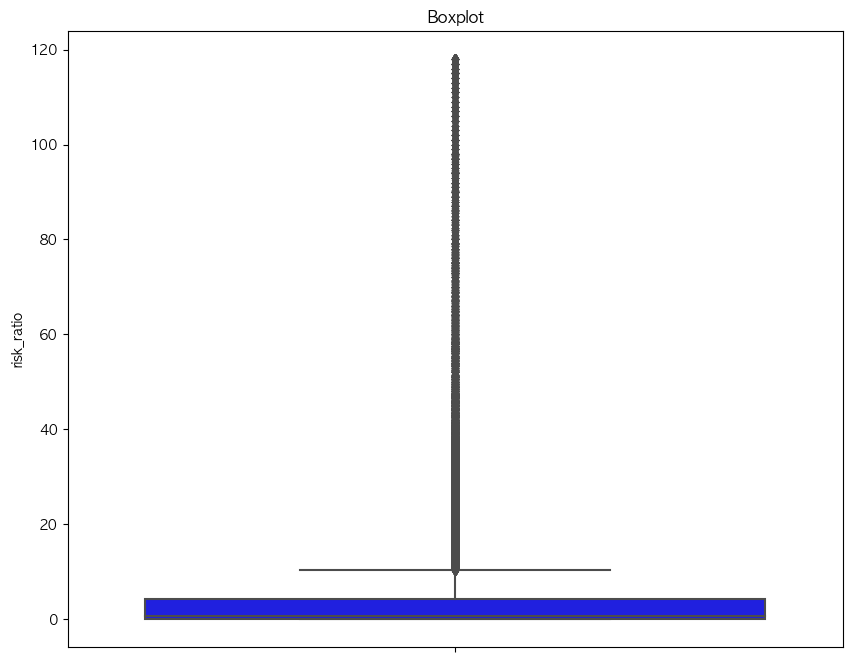

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 8))
sns.boxplot(ax=ax, y='risk_ratio', data=df, color = 'blue')
ax.set_title('Boxplot')
plt.show()

In [5]:
df['risk_ratio'].describe()

count    63838.000000
mean         6.079167
std         14.818858
min          0.000000
25%          0.000000
50%          0.716418
75%          4.161944
max        118.000000
Name: risk_ratio, dtype: float64

In [6]:
df['is_churn'].value_counts()

is_churn
0    50729
1    13109
Name: count, dtype: int64

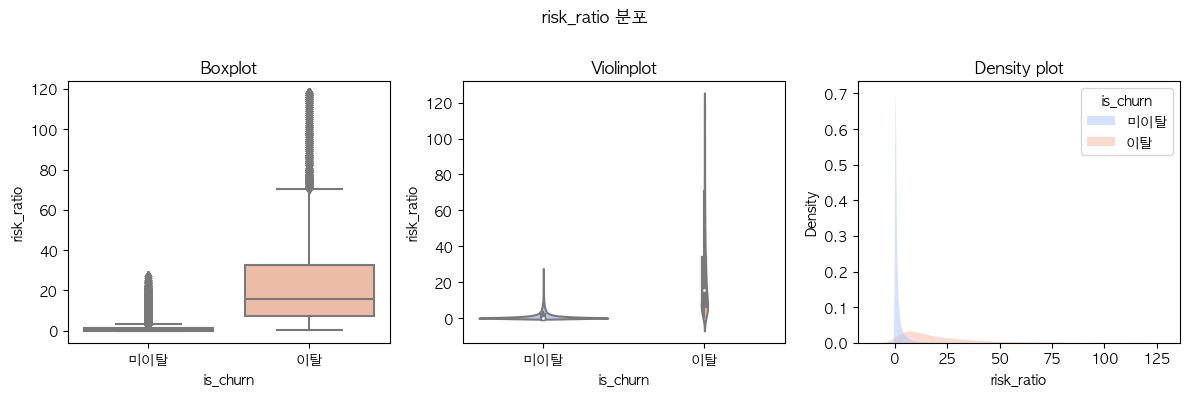

In [7]:
# palette = plasma, coolwarm, magma, BuGn, Dark2 
def plot_numeric (data, num_var, outcome):
  
    palette = 'coolwarm'
    
    mapping = {0 : '미이탈', 1 : '이탈'}
    data[outcome] = data[outcome].replace(mapping)

    fig, axs = plt.subplots(1,3, figsize=(12,4))
    fig.suptitle(f'{num_var} 분포', fontsize = 12)

    # Boxplot
    sns.boxplot(ax=axs[0], x= outcome, y=num_var, data= data, palette = palette)
    axs[0].set_title('Boxplot')

    # Violinplot
    sns.violinplot(ax=axs[1], x = outcome, y = num_var, data = data, palette = palette)
    axs[1].set_title('Violinplot')
    
    # KDE plot
    sns.kdeplot(ax=axs[2], data = data, x = num_var, hue = outcome, fill = True, common_norm = False, palette = palette, alpha=.5, linewidth=0)
    axs[2].set_title('Density plot')
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.8) # title 공간 확보
    
    #fig.savefig(f'graphs_all/{num_var}_distributions.png')
    plt.show()
    plt.close(fig)

plot_numeric (df, 'risk_ratio', 'is_churn')

## qcut으로 나누기 

In [ ]:
# # 데이터를 5개의 그룹으로 
# df['quintile_group'] = pd.qcut(df['risk_ratio'], 5, labels=False, duplicates='drop')

# # 기본 통계 계산 
# grouped_stats = df.groupby('quintile_group')['risk_ratio'].agg(['mean', 'median']).reset_index()

# # 각 그룹의 크기(데이터 개수)를 계산
# grouped_stats['count'] = df.groupby('quintile_group').size().values

# # 각 그룹의 경계값.
# quintile_labels, quintile_bins = pd.qcut(df['risk_ratio'], 5, retbins=True, duplicates='drop')

# grouped_stats['Lower_Bound'] = quintile_bins[:-1]
# grouped_stats['Upper_Bound'] = quintile_bins[1:]

# grouped_stats


In [9]:
# 데이터를 5개의 그룹으로 
df_2 = df[df['risk_ratio'] >= 1 ]
df_2['quintile_group'] = pd.qcut(df_2['risk_ratio'], 5, labels=False, duplicates='drop')

# 기본 통계 계산 
grouped_stats = df_2.groupby('quintile_group')['risk_ratio'].agg(['mean', 'median']).reset_index()

# 각 그룹의 크기(데이터 개수)를 계산
grouped_stats['count'] = df_2.groupby('quintile_group').size().values

# 각 그룹의 경계값.
quintile_labels, quintile_bins = pd.qcut(df_2['risk_ratio'], 5, retbins=True, duplicates='drop')

grouped_stats['Lower_Bound'] = quintile_bins[:-1]
grouped_stats['Upper_Bound'] = quintile_bins[1:]

grouped_stats

,quintile_group,mean,median,count,Lower_Bound,Upper_Bound
0,0,1.391757,1.382609,5630,1.000000,1.852174
1,1,2.635490,2.573913,5628,1.852174,3.679795
2,2,5.534236,5.363636,5677,3.679795,8.000000
3,3,12.836830,12.298936,5600,8.000000,20.000000
4,4,45.520819,36.666667,5610,20.000000,118.000000


## percentitle로 나누기 

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 8))
sns.boxplot(ax=ax, y='risk_ratio', data=df_2, color = 'blue')
ax.set_title('Boxplot')
plt.show()

In [11]:
df_over1 = df[df['risk_ratio'] >= 1 ]

q1 = np.percentile(df_over1['risk_ratio'], 25)
q2 = np.percentile(df_over1['risk_ratio'], 50)
q3 = np.percentile(df_over1['risk_ratio'], 75)

# 4분위수를 기준으로 데이터를 나눕니다.
df_over1['quartile_group'] = np.where(df_over1['risk_ratio'] <= q1, 0,
                                      np.where(df_over1['risk_ratio'] <= q2, 1,
                                               np.where(df_over1['risk_ratio'] <= q3, 2, 3)))

# 각 그룹에 대한 기본 통계(평균, 중앙값)를 계산합니다.
grouped_stats = df_over1.groupby('quartile_group')['risk_ratio'].agg(['mean', 'median']).reset_index()

# 각 그룹의 크기(데이터 개수)를 계산합니다.
grouped_stats['count'] = df_over1.groupby('quartile_group').size().values

# 각 그룹의 경계값을 추가합니다.
grouped_stats['Lower_Bound'] = [df_over1['risk_ratio'].min(), q1, q2, q3]
grouped_stats['Upper_Bound'] = [q1, q2, q3, df_over1['risk_ratio'].max()]

grouped_stats

,quartile_group,mean,median,count,Lower_Bound,Upper_Bound
0,0,1.514730,1.487179,7041,1.000000,2.172414
1,1,3.494513,3.358117,7032,2.172414,5.351351
2,2,9.327247,8.816498,7036,5.351351,15.461538
3,3,39.863403,31.000000,7036,15.461538,118.000000


In [12]:
df_over1['risk_ratio'].describe()

count    28145.000000
mean        13.549264
std         19.954364
min          1.000000
25%          2.172414
50%          5.351351
75%         15.461538
max        118.000000
Name: risk_ratio, dtype: float64